<a href="https://colab.research.google.com/github/q-viper/SmogDetection/blob/master/smog_detection_colab_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install keras==2.1.3
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
import os
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
def get_dataset():
#     clear = open('clear.csv', 'r')
    clear = open('/content/drive/My Drive/Smog Detection/clear.csv', 'r')
    smog = open('/content/drive/My Drive/Smog Detection/smog.csv', 'r')

    clear_rows = clear.readlines()
    clear.close()
    
#     smog = open('smog.csv', 'r')
    smog_rows = smog.readlines()
    smog.close()
    
    
    examples = len(clear_rows)
#     print(examples)
#     clear_datasets = np.zeros([examples, 300001])
    clear_datasets = []
    smog_datasets = []
    for i in range(examples):
        single_row = clear_rows[i]
        single_row = single_row.split(',')

        single_row = np.asarray(single_row, dtype = np.int32)
        label = np.array(1)
        clear_datasets.append(np.hstack([label, single_row]))
    
    for i in range(examples):
        single_row = smog_rows[i]
        single_row = single_row.split(',')
        single_row = np.asarray(single_row, dtype = np.int32)
        label = np.array(0)
        smog_datasets.append(np.hstack([label, single_row]))
        
    return clear_datasets + smog_datasets

In [0]:
datasets = get_dataset()

In [0]:
example = np.array(datasets)
np.random.shuffle(example)
examples = len(example)
# print(examples)
labels = np.array([example[i][0] for i in range(examples)])
images = np.array([example[i][1:].reshape(100, 100, 3) / 255 for i in range(examples)])



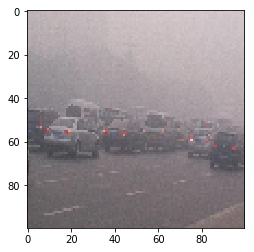

In [5]:
plt.imshow(images[501])
plt.show()

In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2) 
y_train = keras.utils.to_categorical(y_train, num_classes=2)
y_test = keras.utils.to_categorical(y_test, num_classes=2)


In [0]:
# # inception 
# from keras.layers import Input
# from keras.models import Model

# input_img = Input(shape = (100, 100, 3))

# tower_1 = Conv2D(32, (1,1), padding='same', activation='relu')(input_img)
# tower_1 = Conv2D(32, (3,3), padding='same', activation='relu')(tower_1)
# tower_2 = Conv2D(32, (1,1), padding='same', activation='relu')(input_img)
# tower_2 = Conv2D(32, (5,5), padding='same', activation='relu')(tower_2)
# tower_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(input_img)
# tower_3 = Conv2D(32, (1,1), padding='same', activation='relu')(tower_3)

# output = keras.layers.concatenate([tower_1, tower_2, tower_3], axis = 3)

# output = Flatten()(output)
# output = Dropout(0.5)(Dense(960000, activation = 'relu')(output))
# out    = Dense(2, activation='softmax')(output)

# model = Model(inputs = input_img, outputs = out)
# print (model.summary())



In [0]:
# model = Sequential()
# model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = in_shape, data_format = 'channels_last'))
# model.add(Conv2D(32, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
# model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.25))


# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(out_shape, activation='softmax'))

# model.summary()

In [0]:
# from keras.applications.vgg19 import VGG19
# from keras.models import Model

# base_model = VGG19(#weights='imagenet',
#     weights = None, include_top=False, input_shape=in_shape)

# # Add a new top layer
# x = base_model.output
# x = Flatten()(x)
# predictions = Dense(2, activation='softmax')(x)

# # This is the model we will train
# model = Model(inputs=base_model.input, outputs=predictions)

# # First: train only the top layers (which were randomly initialized)
# for layer in base_model.layers:
#     layer.trainable = False

# model.compile(loss='categorical_crossentropy', 
#               optimizer='adam', 
#               metrics=['accuracy'])

In [0]:
# from keras.layers import Input
# model = Sequential()
# # img_input = Input(shape=in_shape)
# # Block 1
# model.add(Conv2D(64, (3, 3), input_shape = in_shape, activation='relu', padding='same', name='block1_conv1'))
# model.add(Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2'))
# model.add(MaxPooling2D((2, 2), name='block1_pool'))
# model.add(Dropout(0.25)) 
  
# # Block 2
# model.add(Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1'))
# model.add(Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2'))
# model.add(MaxPooling2D((2, 2), name='block2_pool'))
# model.add(Dropout(0.25))
 
# # Block 3
# # model.add(Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1'))
# model.add(Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2'))
# model.add(Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3'))
# model.add(MaxPooling2D((2, 2), name='block3_pool'))
# model.add(Dropout(0.25)) 
  
# # Block 4
# # model.add(Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1'))
# model.add(Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2'))
# model.add(Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3'))
# model.add(MaxPooling2D((2, 2), name='block4_pool'))
# model.add(Dropout(0.25))
 
# # Block 5
# # model.add(Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1'))
# model.add(Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2'))
# model.add(Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3'))
# model.add(MaxPooling2D((2, 2), name='block5_pool'))
# model.add(Dropout(0.25))
 
# model.add(Flatten(name='flatten'))
# # model.add(Dense(4096, activation='sigmoid', name='fc1'))
# model.add(Dense(4096, activation='relu', name='fc2'))
# model.add(Dropout(0.25))
# model.add(Dense(2, activation='softmax', name='predictions'))
# model.summary()

In [212]:
from keras.layers import BatchNormalization


in_shape = x_train[0].shape
out_shape = 2
# print(out_shape)
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=in_shape))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.3))


model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.3))

model.add(Conv2D(256,(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.3))



model.add(Flatten())
model.add(Dropout(0.3))

model.add(Dense(1024, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense(out_shape, activation = 'softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_278 (Conv2D)          (None, 100, 100, 32)      896       
_________________________________________________________________
batch_normalization_135 (Bat (None, 100, 100, 32)      128       
_________________________________________________________________
conv2d_279 (Conv2D)          (None, 100, 100, 32)      9248      
_________________________________________________________________
batch_normalization_136 (Bat (None, 100, 100, 32)      128       
_________________________________________________________________
max_pooling2d_145 (MaxPoolin (None, 33, 33, 32)        0         
_________________________________________________________________
dropout_342 (Dropout)        (None, 33, 33, 32)        0         
_________________________________________________________________
conv2d_280 (Conv2D)          (None, 33, 33, 64)        18496     
__________

In [0]:
#Compile the model
sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [214]:
import time 

#Evaluate the model, 
time1 = time.time()
history = model.fit(x_train, y_train, batch_size=64, shuffle = True, epochs=45, validation_split = 0.15)
time2 = time.time()
score = model.evaluate(x_test, y_test, batch_size=32, verbose = 1)
time3 = time.time()
print("Train time = ", (time2 - time1)/60, "min", "\nTest time = ", (time3 - time2)/ 60, "min", "\n Test loss: ", score[0], " Test accuracy: ", score[1])

Train on 6220 samples, validate on 1098 samples
Epoch 1/45
6220/6220 [==============================] - 24s 4ms/step - loss: 0.3985 - acc: 0.8534 - val_loss: 0.2722 - val_acc: 0.8944
Epoch 2/45
6220/6220 [==============================] - 7s 1ms/step - loss: 0.2547 - acc: 0.9000 - val_loss: 0.2809 - val_acc: 0.8998
Epoch 3/45
6220/6220 [==============================] - 7s 1ms/step - loss: 0.2421 - acc: 0.9084 - val_loss: 0.5003 - val_acc: 0.8024
Epoch 4/45
6220/6220 [==============================] - 7s 1ms/step - loss: 0.2384 - acc: 0.9092 - val_loss: 0.3204 - val_acc: 0.8780
Epoch 5/45
6220/6220 [==============================] - 7s 1ms/step - loss: 0.2233 - acc: 0.9158 - val_loss: 0.3196 - val_acc: 0.8543
Epoch 6/45
6220/6220 [==============================] - 8s 1ms/step - loss: 0.2100 - acc: 0.9203 - val_loss: 0.4497 - val_acc: 0.8388
Epoch 7/45
6220/6220 [==============================] - 8s 1ms/step - loss: 0.2074 - acc: 0.9190 - val_loss: 0.2570 - val_acc: 0.9071
Epoch 8/45
62

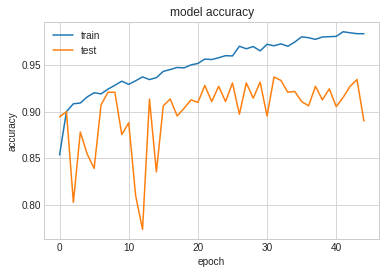

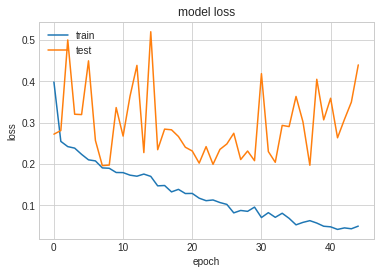

In [215]:
plt.style.use('seaborn-whitegrid')
# list all data in history
# print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [216]:
#save a model

from keras.models import model_from_json
from keras.models import load_model

print(keras.__version__)

model_json = model.to_json()

with open("model1.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("model1.h5")

2.1.3


KeyboardInterrupt: ignored

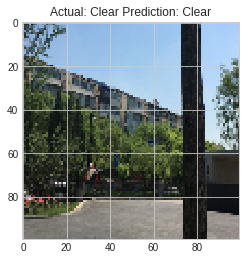

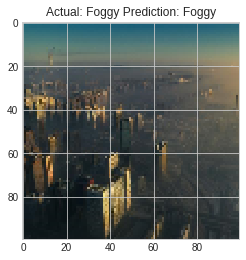

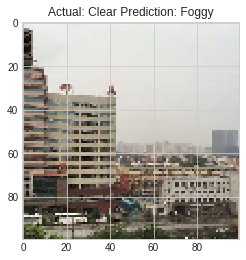

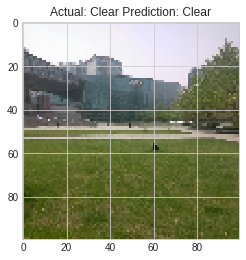

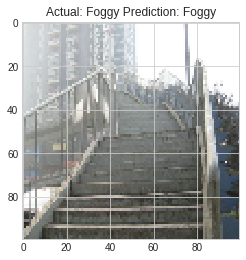

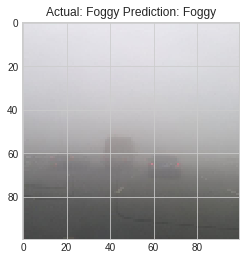

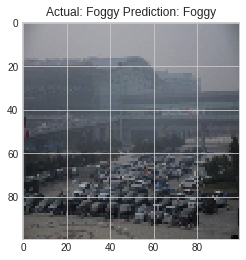

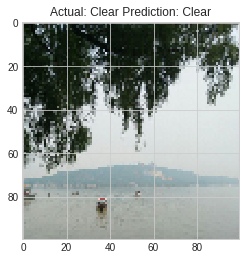

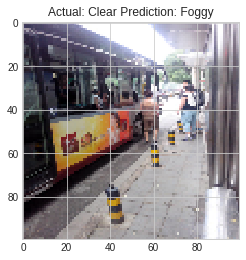

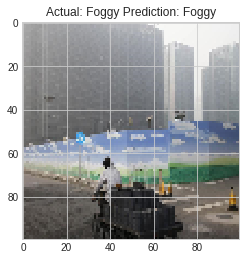

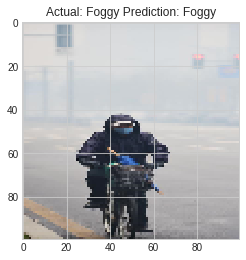

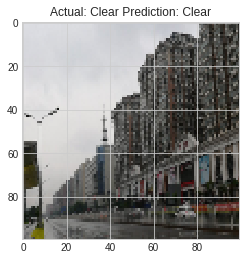

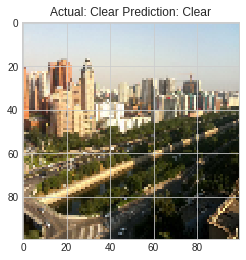

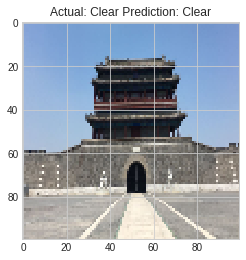

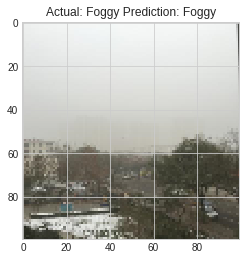

In [217]:
#check some examples
plt.style.use('seaborn-whitegrid')
for i in range(15):
    img = x_test[i].reshape(1, 100, 100, 3)
    lbl = np.argmax(y_test[i])
    prediction = model.predict(img)
#     print(prediction)
    prediction = np.argmax(prediction)
#     print(prediction, lbl)
    classes = ["Foggy", "Clear"]
    title = f"Actual: {classes[lbl]} Prediction: {classes[prediction]}"
    plt.imshow(img.reshape(100, 100, 3))
    plt.title(title)
    plt.show()

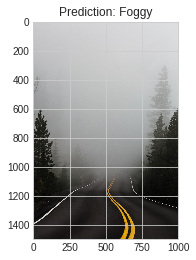

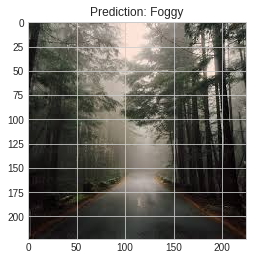

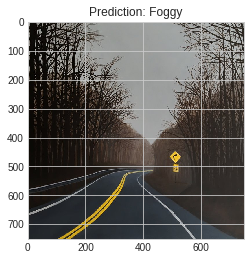

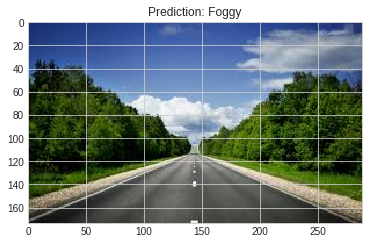

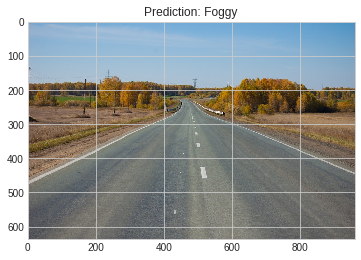

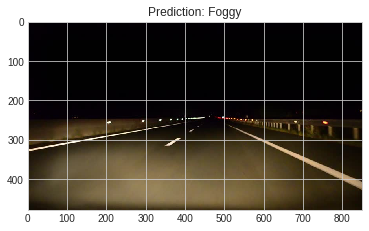

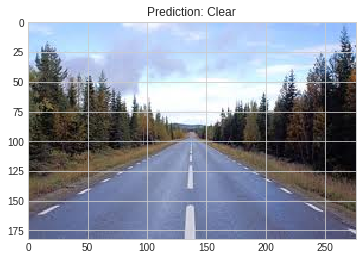

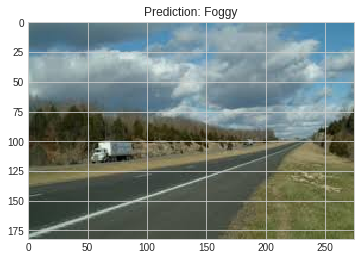

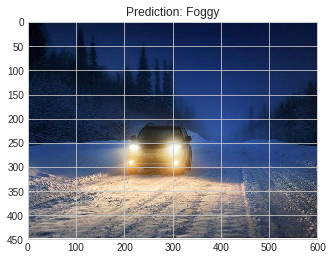

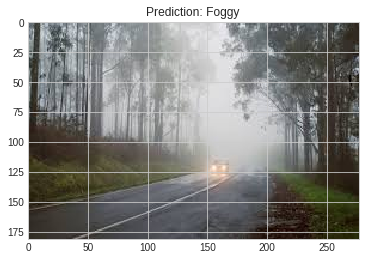

In [218]:
#check other images:
import cv2
for i in range(10):
  img = str(i + 1) + '.jpg'
  img = cv2.imread(img, 1)
  in_img = cv2.resize(img.copy(), (100, 100))
  in_img = in_img.reshape(1, 100, 100, 3) / 255
  
  prediction = model.predict(in_img)
  prediction = np.argmax(prediction)
  classes = ["Foggy", "Clear"]
  
  title = f'Prediction: {classes[prediction]}'
  
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.title(title)
  plt.show()